Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

---

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [1]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# importing 'iris' dataset; applying proper column names

iris = pd.read_csv('iris.data', 
                        sep=',',
                        header=None, 
                        names=['sepal_length','sepal_width',\
                               'petal_length','petal_width',\
                               'class'])
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# verifying that dataset downloaded properly; no missing values

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
# exploring data; adjusting floats to contain only 2 decimal places for readability

iris.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [5]:
# applying numerical codes to 'class' for categorizing -- the functions to be applied cannot handle strings

iris['class'] = iris['class'].astype("category").cat.codes
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# verifying that only 3 unique categories in 'class' exist

iris['class'].unique()

array([0, 1, 2])

Text(0.5,1,'Sepal Width versus Sepal Length')

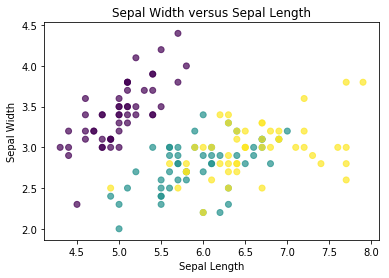

In [7]:
# scatter plot of the Iris' sepal length versus sepal width for all 3 classes

plt.scatter(iris['sepal_length'], iris['sepal_width'], alpha=0.7, 
            c=iris['class'], cmap='viridis')
plt.ylabel("Sepal Width")   # title of the Y axis
plt.xlabel("Sepal Length")   # title of the X axis
plt.title("Sepal Width versus Sepal Length")   # plot title, will be displayed above the plot

Text(0.5,1,'Petal Width versus Petal Length')

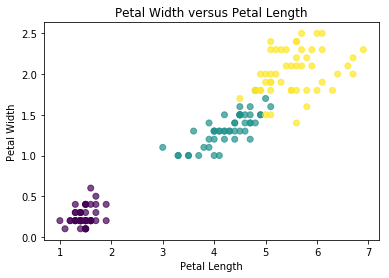

In [8]:
# scatter plot of the Iris' petal length versus petal width for all 3 classes

plt.scatter(iris['petal_length'], iris['petal_width'], alpha=0.7, 
            c=iris['class'], cmap='viridis')
plt.ylabel("Petal Width")   # title of the Y axis
plt.xlabel("Petal Length")  # title of the X axis
plt.title("Petal Width versus Petal Length")   # plot title, will be displayed above the plot

In [9]:
# denote the dependent variable 'class' as 'y'

y = iris['class']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int8

In [10]:
# denoting the independent variables as 'X'

X = iris

In [11]:
# split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# generate KNN Classifier

knn = KNeighborsClassifier(n_neighbors=50)

In [13]:
# train the model using the training sets

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [14]:
# predict the response for the test dataset

y_pred = knn.predict(X_test)

In [15]:
# use accuracy function to see how often the classifier is correct

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8444444444444444


In [16]:
# generating an array of the independent variable results

y_test_as_array = np.array(y_test)
y_test_as_array

array([0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0,
       0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2,
       2], dtype=int8)

In [17]:
# verifying the independent variable predicted outcomes

y_pred

array([0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0,
       0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2,
       1], dtype=int8)

In [18]:
# counting the number of correct classification predictions

count_y_pred_matches = np.sum(y_test_as_array == y_pred)
count_y_pred_matches

38

In [19]:
# counting the number of incorrect classification predictions

count_non_y_pred_matches = np.sum(y_test_as_array != y_pred)
count_non_y_pred_matches

7

In [20]:
import random

In [21]:
# this function generates prediction accuracies all in one go;
# the input is the number of k-neighbours; 
# the output is the accuracy of the classification prediction

def knn_model(k):
    
    start = 0.000
    stop = (k / X.count(0)[0])
    z = random.uniform(start, (1 - stop)) # 'z' is the 'Test Size' as a random float less than 1 but greater than 0;
                                          # dynamically accounts for the function input (k) since the resulting
                                          # sample size must be greater than k
    X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=z)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    return accuracy_score(y_test, y_pred)

print(knn_model(1))

1.0


In [22]:
from itertools import repeat

In [23]:
# generating a DataFrame of the accuracy outputs computed by the KNN function; 
# 10 tests produce 10 accuracy percentages for each k = 1, 3, 5, 7, 10, 20, 30, 40, 50

accuracy_tests = pd.DataFrame([[knn_model(1) for knn_model in repeat(knn_model, 10)],
                          [knn_model(3) for knn_model in repeat(knn_model, 10)],
                          [knn_model(5) for knn_model in repeat(knn_model, 10)],
                          [knn_model(7) for knn_model in repeat(knn_model, 10)],
                          [knn_model(10) for knn_model in repeat(knn_model, 10)],
                          [knn_model(20) for knn_model in repeat(knn_model, 10)],
                          [knn_model(30) for knn_model in repeat(knn_model, 10)],
                          [knn_model(40) for knn_model in repeat(knn_model, 10)],
                          [knn_model(50) for knn_model in repeat(knn_model, 10)]]).transpose()
accuracy_tests

,0,1,2,3,4,5,6,7,8
0,1.000000,1.000000,1.000000,1.000000,0.992126,0.973913,0.900000,0.788889,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.978723,0.893333,0.784810
3,0.978723,1.000000,1.000000,1.000000,0.987654,0.981982,0.986301,0.833333,1.000000
4,1.000000,1.000000,0.307143,1.000000,1.000000,1.000000,1.000000,1.000000,0.670330
5,1.000000,0.954198,0.983471,1.000000,1.000000,1.000000,0.942529,1.000000,0.916667
6,0.990566,1.000000,0.950000,0.955556,0.323741,0.985294,0.316667,0.432990,0.691489
7,1.000000,1.000000,1.000000,0.990566,1.000000,0.619835,0.318966,0.944444,0.972973
8,1.000000,1.000000,1.000000,1.000000,0.984496,0.986842,1.000000,1.000000,0.933333
9,1.000000,0.990741,1.000000,0.596899,0.988889,0.979381,0.918367,0.961538,0.252525


In [24]:
# renaming columns to reflect which columns are associated with which number of k-neighbours

accuracy_tests.columns = ['k1', 'k3', 'k5', 'k7', 'k10', 'k20', 'k30', 'k40', 'k50']
accuracy_tests

,k1,k3,k5,k7,k10,k20,k30,k40,k50
0,1.000000,1.000000,1.000000,1.000000,0.992126,0.973913,0.900000,0.788889,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.978723,0.893333,0.784810
3,0.978723,1.000000,1.000000,1.000000,0.987654,0.981982,0.986301,0.833333,1.000000
4,1.000000,1.000000,0.307143,1.000000,1.000000,1.000000,1.000000,1.000000,0.670330
5,1.000000,0.954198,0.983471,1.000000,1.000000,1.000000,0.942529,1.000000,0.916667
6,0.990566,1.000000,0.950000,0.955556,0.323741,0.985294,0.316667,0.432990,0.691489
7,1.000000,1.000000,1.000000,0.990566,1.000000,0.619835,0.318966,0.944444,0.972973
8,1.000000,1.000000,1.000000,1.000000,0.984496,0.986842,1.000000,1.000000,0.933333
9,1.000000,0.990741,1.000000,0.596899,0.988889,0.979381,0.918367,0.961538,0.252525


In [25]:
# generating the average accuracy percentage of 10 tests for each k-neighbour

acc_ave = accuracy_tests.mean()
acc_ave

k1     0.996929
k3     0.994494
k5     0.924061
k7     0.954302
k10    0.927691
k20    0.952725
k30    0.836155
k40    0.885453
k50    0.822213
dtype: float64

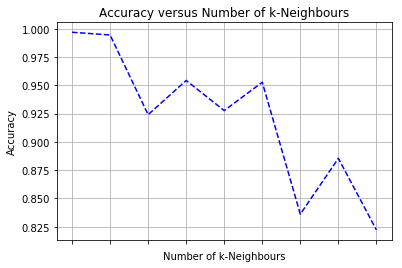

In [26]:
# generating line plot of the classification's accuracy against the number of k-neighbours

acc_ave_plot = acc_ave.plot.line(color = 'blue', linestyle = '--')

plt.ylabel("Accuracy")   # title of the Y axis
plt.xlabel("Number of k-Neighbours")   # title of the X axis
plt.title("Accuracy versus Number of k-Neighbours")   # plot title, will be displayed above the plot
plt.grid()

In [27]:
# ANSWER TO QUESTION 9

# As the number of k-neighbours tends to the number of observations in the entire dataset, the accuracy of the
# classification model becomes less reliable. For example, when k-neighbours is equal to 1-10, the model produces 
# 10-test average accuracies greater than 90 percent. However, when k-neighbours is greater than 10, the model
# produces 10-test average accuracies that drift away from 90+ percent.
